In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
from surface_seg.envs.multicomponent_surface_env import MultiComponentSurface

MCS_gym = MultiComponentSurface()
MCS_gym = gym.wrappers.Monitor(MCS_gym, "./vid", force=True)

[autoreload of surface_seg.envs.multicomponent_surface_env failed: Traceback (most recent call last):
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_ex

In [55]:
import tensorforce 
from tensorforce.agents import Agent


env = tensorforce.environments.OpenAIGym(MCS_gym,
                                                 max_episode_timesteps=200,
                                                visualize=False)

agent = Agent.create(
    agent='dqn', environment=env, 
    batch_size=10, 
    learning_rate=1e-3,
    memory = 1000,
    max_episode_timesteps = 200
)

Exception ignored in: <function Monitor.__del__ at 0x2aab33e49280>
Traceback (most recent call last):
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/gym-0.17.2-py3.8.egg/gym/wrappers/monitor.py", line 226, in __del__
    self.close()
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/gym-0.17.2-py3.8.egg/gym/wrappers/monitor.py", line 133, in close
    if not self.enabled:
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/gym-0.17.2-py3.8.egg/gym/core.py", line 216, in __getattr__
    return getattr(self.env, name)
AttributeError: 'OpenAIGym' object has no attribute 'enabled'


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
from tensorforce.execution import Runner

runner = Runner(
    agent=agent,
    environment=env,
    max_episode_timesteps=200
)

runner.run(num_episodes=10)

# runner.run(num_episodes=10, evaluation=True)

runner.close()

Exception ignored in: <function Monitor.__del__ at 0x2aab33e49280>
Traceback (most recent call last):
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/gym-0.17.2-py3.8.egg/gym/wrappers/monitor.py", line 226, in __del__
    self.close()
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/gym-0.17.2-py3.8.egg/gym/wrappers/monitor.py", line 137, in close
    self._close_video_recorder()
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/gym-0.17.2-py3.8.egg/gym/wrappers/monitor.py", line 209, in _close_video_recorder
    self.video_recorder.close()
  File "/global/homes/z/zulissi/miniconda3/envs/surface_seg/lib/python3.8/site-packages/gym-0.17.2-py3.8.egg/gym/wrappers/monitoring/video_recorder.py", line 129, in close
    os.remove(self.path)
FileNotFoundError: [Errno 2] No such file or directory: '/global/u2/z/zulissi/surface-seg/examples/vid/openaigym.video.1.79657.video000000.

In [ ]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder 
rec = VideoRecorder(env)      # Create the video recorder
rec.capture_frame()

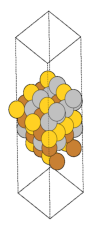

In [23]:
env = MCS_gym
from matplotlib import pyplot as plt
%matplotlib inline

from IPython import display

img = plt.imshow(env.render(mode='rgb_array')) # only call this once
plt.axis('off')
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [32]:
runner.episodes


10